In [1]:
import numpy as np
import pandas as pd
import glob
import os
import cmath
from decimal import *
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2

In [2]:
#These will eventually be input variables 
P='P1' 
A=3
path=r'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz'
filestr=str(P + ' '+str('%.3f'%float(A))+ ' '+"*0*.txt")
filestr

'P1 3.000 *0*.txt'

In [6]:
all_files=glob.glob(os.path.join(path, filestr))
all_files[:9]

['G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 001.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 002.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 003.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 004.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 005.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 006.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 007.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 008.txt',
 'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz/P1\\P1 3.000 009.txt']

In [311]:
initfile=0
finfile=6
data=pd.concat((pd.read_csv(f,delimiter='\t') for f in all_files[initfile:finfile]),axis=1)

nr=int(np.shape(data)[0]*np.shape(data)[1]/5) #desired total number of rows
data.columns=np.tile(('Time','Io','If','J','V'),int(np.shape(data)[1]/5))

dt=data.iloc[1,0]

In [312]:
#Create time array based on number of samples and dt between samples
t=np.arange(0,nr)[:,]*dt
np.shape(t)

(12600,)

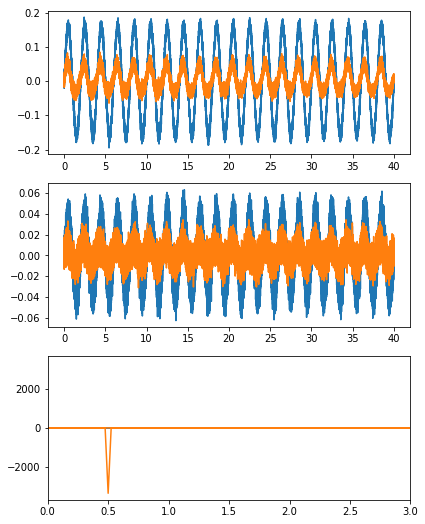

In [233]:
#print(np.mean(Io),np.mean(If),np.mean(J),np.mean(V))
Io
np.shape(Io)
Ar=np.array([1,2])
dum=np.array([4])
for n in Ar:
    dum=np.concatenate((dum,Ar))
    print(dum)


Io[3,525]

[4 1 2]
[4 1 2 1 2]


array([0.20588935])

In [3]:
%autoreload
Ampa=np.r_[1:6]
Xrayraw=False
import datain
data=[]
for n in Ampa:
    if n == 1:
        print(n)
        data=np.array(datain.getdata(P,n,path,0,120,False,Xrayraw))
        print(np.shape(data),data[2,525])
    else:
        print(n)
        data=np.concatenate((data,datain.getdata(P,n,path,0,120,False,Xrayraw)),axis=2)
        print(np.shape(data),data[2,525])
if Xrayraw==True:
    Io=data[0,:,:]
    If=data[1,:,:]
    J=data[2,:,:]
    V=data[3,:,:]
    t=data[4,:,:]
    Ir=If/Io
    dt=t[1,0]
else:
    Ir=data[0,:,:]
    J=data[1,:,:]
    V=data[2,:,:]
    t=data[3,:,:]
    dt=t[1,0]


1
(4, 252000, 1) [0.20588935]
2
(4, 252000, 2) [0.20588935 0.15928144]
3
(4, 252000, 3) [0.20588935 0.15928144 0.11842144]
4
(4, 252000, 4) [0.20588935 0.15928144 0.11842144 0.07606199]
5
(4, 252000, 5) [0.20588935 0.15928144 0.11842144 0.07606199 0.03713879]


239.99880761999998

In [385]:
Ns=V[:,0].size

In [132]:

print(np.shape(t))
print(np.shape(Ir))
print(np.shape(V))
print(np.shape(J))
print(dt)

(42000, 5)
(42000, 5)
(42000, 5)
(42000, 5)
0.00095238


In [405]:
Vfft=np.fft.fft(V[:,0])/(Ns/2)
Jfft=np.fft.fft(J[:,0])/(Ns/2)
Ifft=np.fft.fft(Ir[:,0])/(Ns/2)
freq=np.fft.fftfreq(Ns,dt)

print(np.abs(Vfft[120]),np.angle(Vfft[120]),Vfft[120])

0.19931272134526823 -1.5654663926613661 (0.001062318646968624-0.19930989029435756j)


In [412]:
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

In [414]:
Vpol=[]
Vang=np.angle(Vfft)
Jang=np.angle(Jfft)
Iang=np.angle(Ifft)

Vmag=np.abs(Vfft)
Jmag=np.abs(Jfft)
Imag=np.abs(Ifft)

Vang2=Vang-Vang[120]
Jang2=Jang-Vang[120]
Iang2=Iang-Vang[120]

Vfft2=P2R(Vmag,Vang2)
Jfft2=P2R(Jmag,Jang2)
Ifft2=P2R(Imag,Iang2)
##Should write function to phase adjust. Include option for harmonics adjustment too(?)

In [444]:
print(Vfft[120],Vfft2[120],np.abs([Vfft[120],Vfft2[120]]))
print(Jfft[120],Jfft2[120],np.abs([Jfft[120],Jfft2[120]]))
print(Ifft[120],Ifft2[120],np.abs([Ifft[120],Ifft2[120]]))

(0.001062318646968624-0.19930989029435756j) (0.19931272134526823+0j) [0.19931272 0.19931272]
(0.017839227218446076-0.050913287296986263j) (0.05100764557721224+0.017567610645910597j) [0.05394813 0.05394813]
(0.0032132438070222617+0.041742515476106135j) (-0.04172479626593194+0.0034356819705554063j) [0.04186601 0.04186601]


In [408]:
print(Vang[120])
print(Jang[120])
print(Iang[120])
np.ex

-1.5654663926613661
-1.2337790006640572
1.4939701108041392


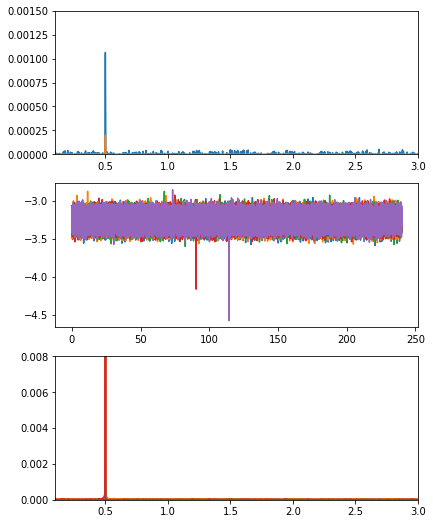

In [440]:
fig=plt.figure(figsize=(6.5,9))
ax1 = fig.add_subplot(311)
# ax1.plot(t[:,1],V[:,1],t[:,0],J[:,0])
ax1.plot(freq,Vfft.real,freq,Vfft2.real*.001)
ax1.set_xlim(0.1,3)
ax1.set_ylim(0,.0015)

if Xrayraw==True:   
    ax2=fig.add_subplot(312)
    ax2.plot(t,Io,t,If,t,Ir)
else:
    ax2=fig.add_subplot(312)
    ax2.plot(t,Ir)

ax3=fig.add_subplot(313)
ax3.plot(freq,np.abs(Vfft),freq,np.abs(Vfft2),freq,Vfft.real,freq,Vfft2.real)
ax3.set_xlim(0.1,3)
ax3.set_ylim(0,.008)
plt.show()

In [190]:
V.shape

(233100,)

In [384]:
print(freq[120],V[525,1],np.abs(Vfft[120]))
abs(Vfft[120])/V[525,1]

0.5000005000005001 0.1592814435 0.04186600690340944


0.2628429651531218

In [162]:
print(dt,np.sqrt(dt),dt*V[:,0].size)

0.00095238 0.030860654562079527 39.99996


In [171]:
np.sqrt(V[:,0].size)

204.93901531919198

In [205]:
freq[int(V[:,0].size/2)-1]

524.996020491516

In [202]:
V[:,0].size/2

116550.0

In [207]:
1/(2*dt)

525.000525000525

In [248]:
t[-1]

array([221.99882562, 221.99882562, 221.99882562, 221.99882562,
       221.99882562])

In [263]:
filestr=str(P + ' ' + str('%.3f'%float(1)) + ' '+ "*.txt")
#Making array of strings to help pandas find all data files
# for a single measured amplitude and location (point)
all_files=glob.glob(os.path.join(path,P, filestr))
all_files
len(all_files)

121

In [284]:
np.sqrt(V[:,0].size)/2

250.99800796022265

In [287]:
%%timeit [-n]
Vfft=np.fft.fft(V[:,1])/(V[:,0].size/2)

12 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [381]:
%%timeit [-n]
Vfft=np.fft.fft(Ir[:,0])/ns

15.1 ms ± 4.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [289]:
ns=V[:,0].size/2

In [347]:
Vfft.size
print(Vfft[-120].imag,Vfft[120].imag,np.shape(Vfft))

0.1594757843185224 -0.1594757843185224 (252000,)


In [370]:
Vfft_fi=np.zeros((1,Vfft.size))
Vfft_fi=Vfft_fi+1j*Vfft_fi
Vfft_fi[0,-120]=np.complex(Vfft[-120].real,Vfft[-120].imag)
Vfft_fi[0,120]=np.complex(Vfft[120].real,Vfft[120].imag)
Vfft_fi[0,120]

(0.00081105666507623-0.1594757843185224j)

In [372]:
Vifft=np.fft.ifft(Vfft_fi)*ns
Vifft.resize(V[:,0].size)


print(np.shape(Vifft),np.shape(V[:,0]))

(252000,) (252000,)


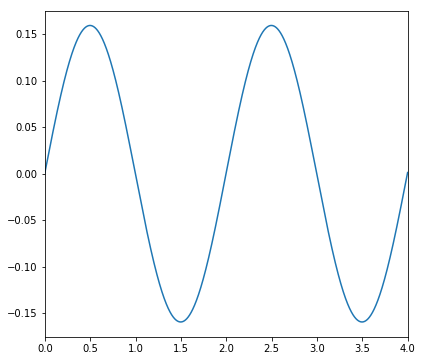

In [380]:
fig=plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(111)
ax1.plot(t[:,1],Vifft)
ax1.set_xlim(0,4)

plt.show()